## Let's Access Data from [coindesk](https://www.coindesk.com/API) but [slowwly](http://slowwly.robertomurray.co.uk/).

In [1]:
import pandas as pd
import requests
import json

coindesk_url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-02-29"
slowwly_url = "http://slowwly.robertomurray.co.uk/delay/8000/url/"
web_api_url = slowwly_url + coindesk_url

### The response (routed through slowwly) takes a while

In [2]:
response = requests.get(web_api_url)
data_dict = response.json()
print(data_dict)

{'bpi': {'2020-11-16': 16720.605, '2020-11-17': 17676.335, '2020-11-18': 17785.2667, '2020-11-19': 17815.0783, '2020-11-20': 18675.4333, '2020-11-21': 18697.5133, '2020-11-22': 18423.5133, '2020-11-23': 18381.7167, '2020-11-24': 19161.2683, '2020-11-25': 18723.5467, '2020-11-26': 17182.485, '2020-11-27': 17156.3033, '2020-11-28': 17737.9667, '2020-11-29': 18196.5467, '2020-11-30': 19708.0967, '2020-12-01': 18795.1967, '2020-12-02': 19226.22, '2020-12-03': 19450.2667, '2020-12-04': 18657.42, '2020-12-05': 19157.925, '2020-12-06': 19386.7117, '2020-12-07': 19185.3967, '2020-12-08': 18322.5533, '2020-12-09': 18553.92, '2020-12-10': 18255.9233, '2020-12-11': 18039.7617, '2020-12-12': 18811.0617, '2020-12-13': 19168.7533, '2020-12-14': 19274.8733, '2020-12-15': 19444.5483, '2020-12-16': 21349.8467}, 'disclaimer': 'This data was produced from the CoinDesk Bitcoin Price Index. BPI value data returned as USD.', 'time': {'updated': 'Dec 17, 2020 00:03:00 UTC', 'updatedISO': '2020-12-17T00:03:00

In [3]:
bpi_dict = data_dict["bpi"]
# df = pd.DataFrame.from_dict(
#     {
#         "Date": pd.Series(list(bpi_dict.keys()), dtype='datetime64[ns]'),
#         "Price": pd.Series(list(bpi_dict.values()), dtype='float64')
#     })
df = pd.DataFrame(
    {"Price": list(bpi_dict.values())},
    index = pd.Index(list(bpi_dict.keys()), dtype='datetime64[ns]'))

print(df.head())

                 Price
2020-11-16  16720.6050
2020-11-17  17676.3350
2020-11-18  17785.2667
2020-11-19  17815.0783
2020-11-20  18675.4333


### Create a line chart for the Bitcoin Price Index data

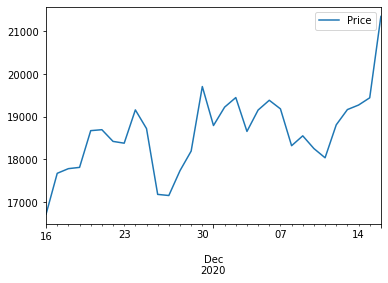

In [5]:
line = df.plot.line()